<a href="https://colab.research.google.com/github/isaacyeremia/Data-Mining/blob/main/Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024(1).xls'
df = pd.read_excel(file_path)

In [4]:
# Cek jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


no                  0
diagnosa            0
institusi           0
area                0
rumah            1131
tipe             2750
biaya_berobat      25
dtype: int64


In [5]:
# prompt: tolong handle data mising yang ada di kolom fitur fitur berikut ini dengan mengisi kolom data mising:
# no                  0
# diagnosa            0
# institusi           0
# area                0
# rumah            1131
# tipe             2750
# biaya_berobat      25
# dtype: int64

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024(1).xls'
df = pd.read_excel(file_path)

# Mengisi missing value pada kolom 'rumah' dengan modus (nilai yang paling sering muncul)
df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)

# Mengisi missing value pada kolom 'tipe' dengan modus (nilai yang paling sering muncul)
df['tipe'].fillna(df['tipe'].mode()[0], inplace=True)

# Mengisi missing value pada kolom 'biaya_berobat' dengan median (nilai tengah)
df['biaya_berobat'].fillna(df['biaya_berobat'].median(), inplace=True)

# Cek kembali jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
no               0
diagnosa         0
institusi        0
area             0
rumah            0
tipe             0
biaya_berobat    0
dtype: int64


<ipython-input-5-64fb50c67e10>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)
<ipython-input-5-64fb50c67e10>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [6]:
# prompt: simpan dataset yang sudah terhandle, ke gdrive

# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")

Dataset berhasil disimpan ke: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx


In [7]:
# prompt: tolong buat semua isi data menjadi lowercase dan buat agar isi kolom fitur biaya_berobat menjadi range 250.000, jadi contoh pertama 0-250.000 lalu kedua ada 250.000-500.000

# Convert all string columns to lowercase
for column in df.select_dtypes(['object']):
  df[column] = df[column].str.lower()

# Create a new column for the range of biaya_berobat
def categorize_biaya(biaya):
  if biaya <= 250000:
    return '0-250.000'
  elif biaya <= 500000:
    return '250.000-500.000'
  elif biaya <= 750000:
    return '500.000-750.000'
  elif biaya <= 1000000:
    return '750.000-1.000.000'
  else:
    return '>1.000.000'

df['range_biaya_berobat'] = df['biaya_berobat'].apply(categorize_biaya)

# Print the updated DataFrame
print(df.head())


# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")

   no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum      1172500.0          >1.000.000  
1  dokter umum       454000.0     250.000-500.000  
2  dokter umum        59000.0           0-250.000  
3  dokter umum        80500.0           0-250.000  
4  dokter umum       586000.0     500.000-750.000  
Dataset berhasil disimpan ke: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx


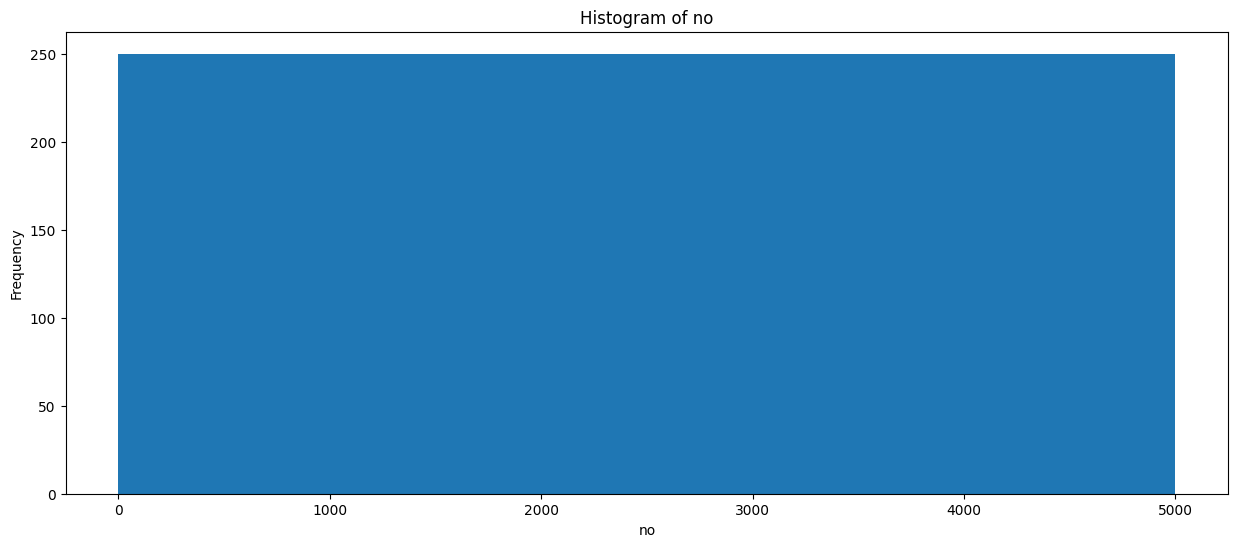

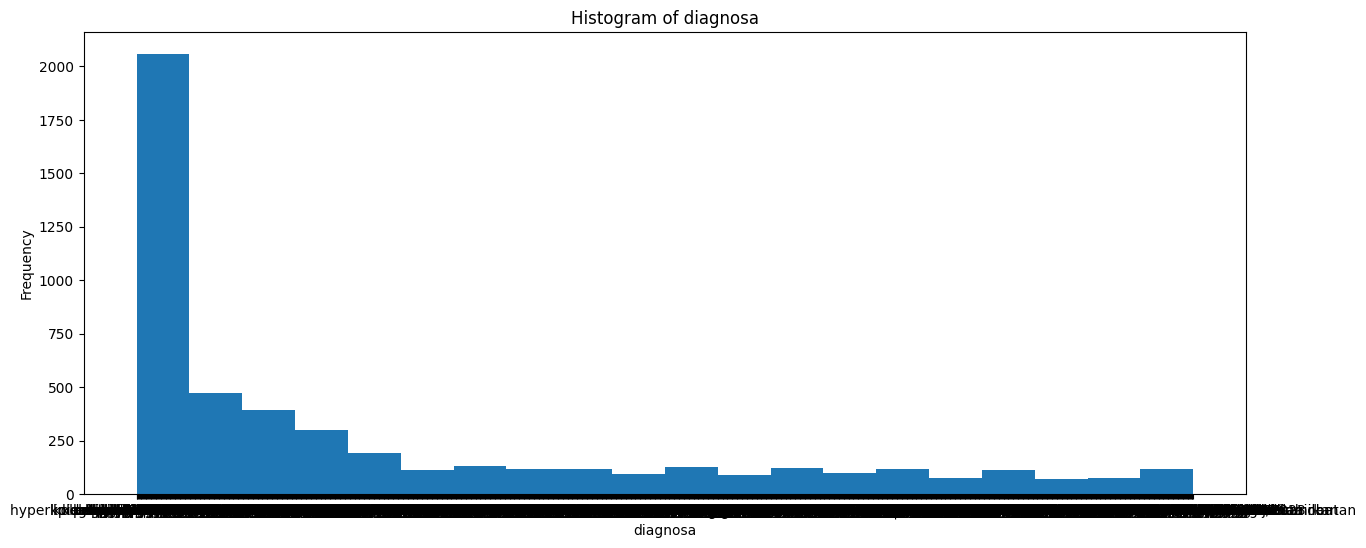

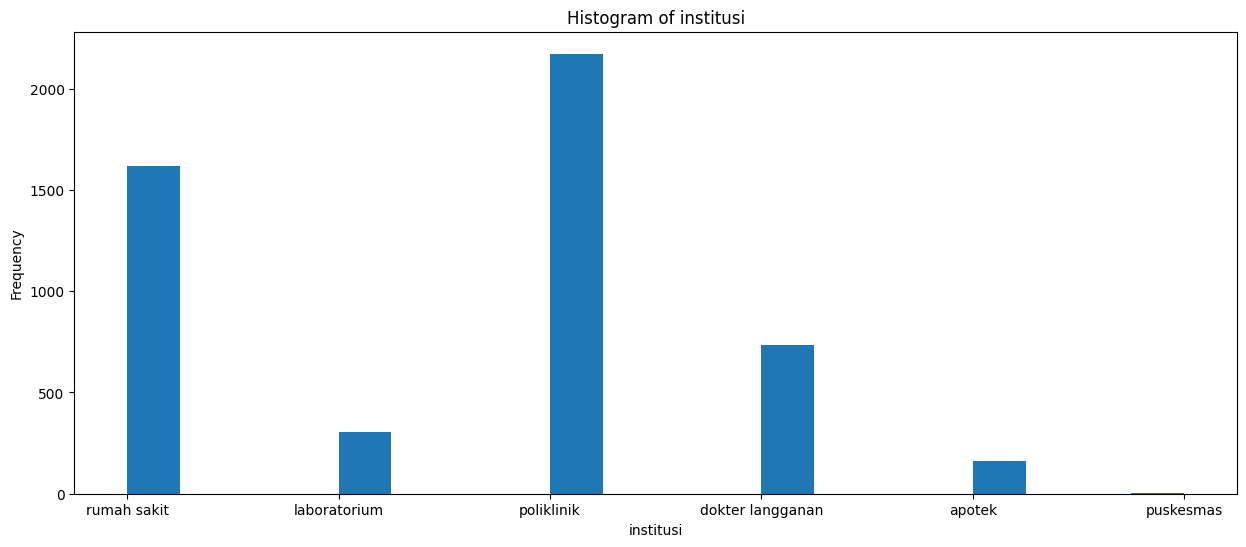

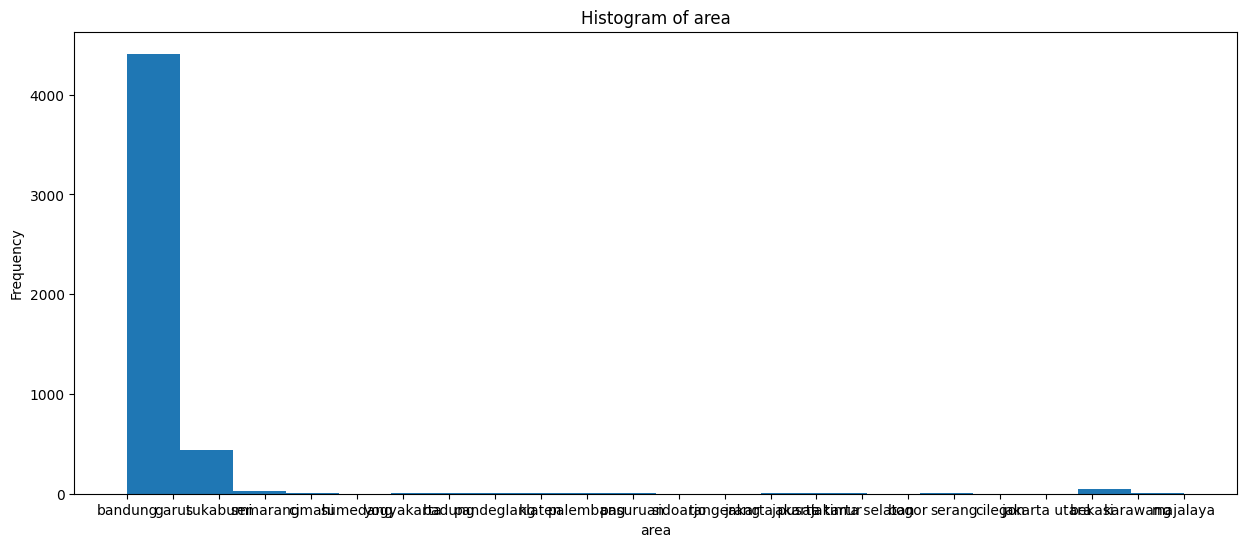

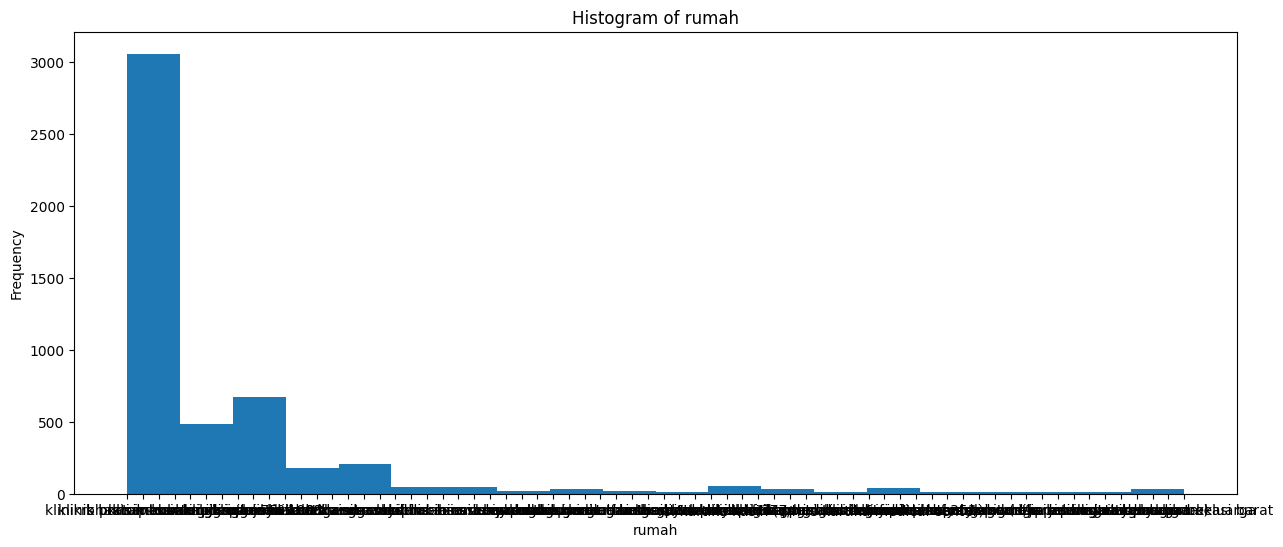

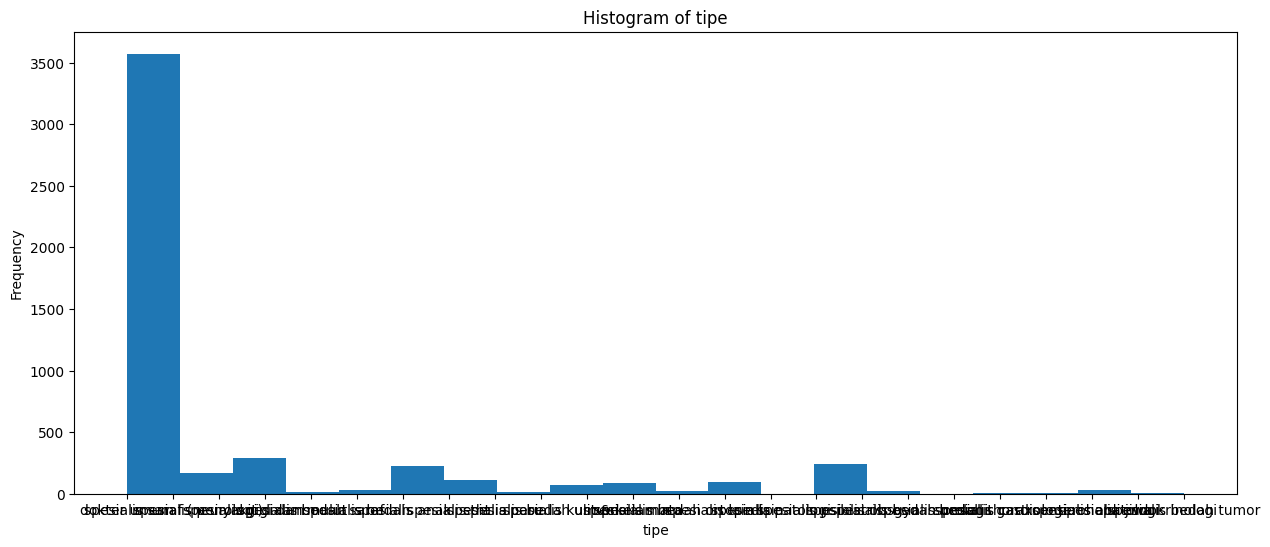

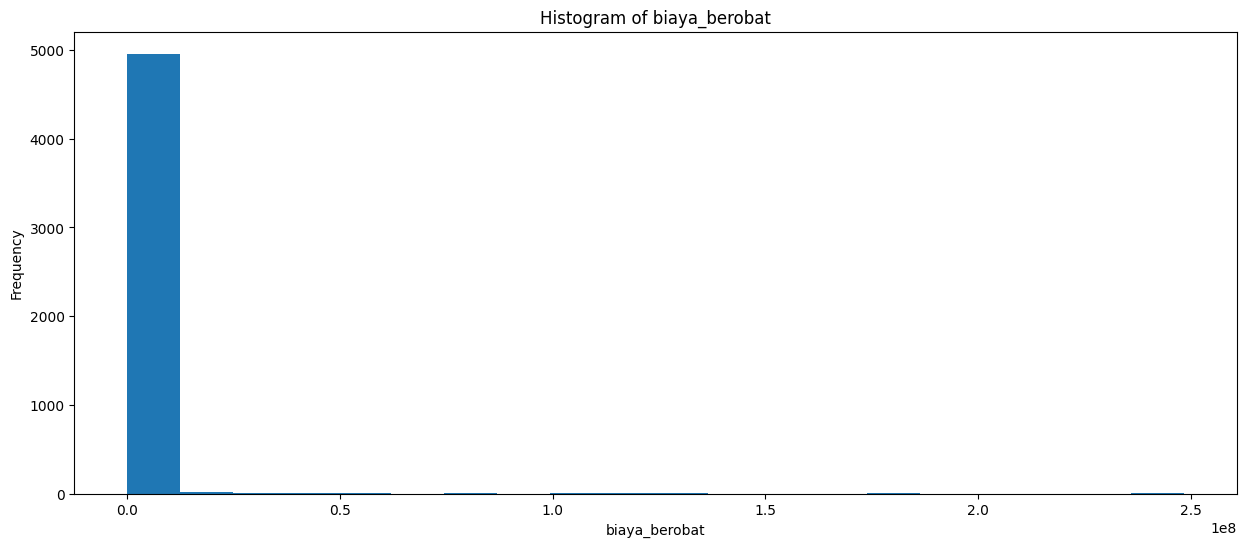

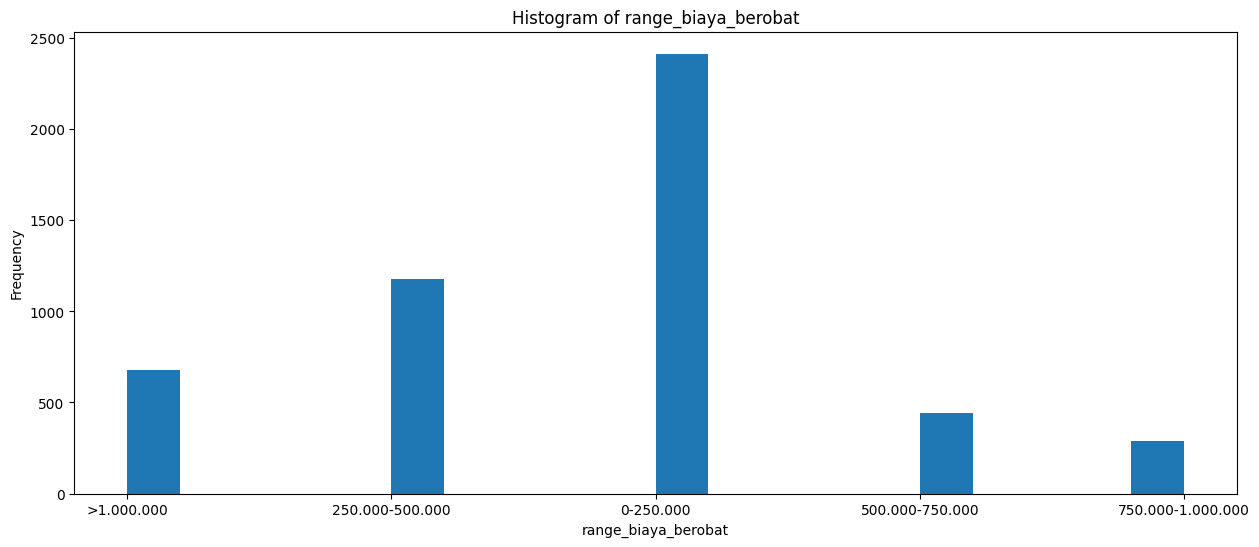

In [8]:

import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(15, 6))  # Atur lebar dan panjang diagram
  plt.hist(df[column], bins=20)  # Buat histogram dengan 20 bins
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

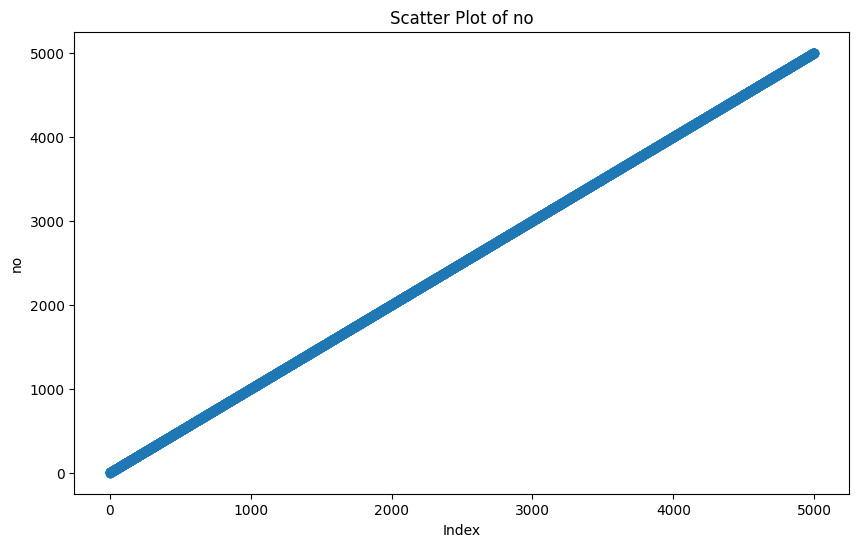

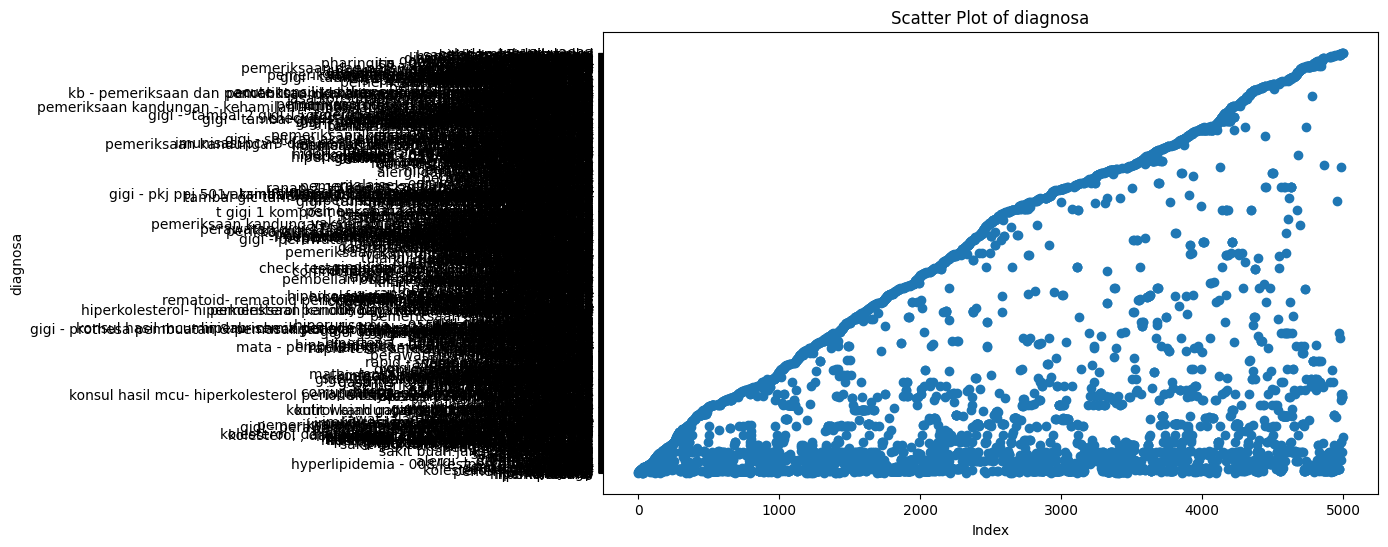

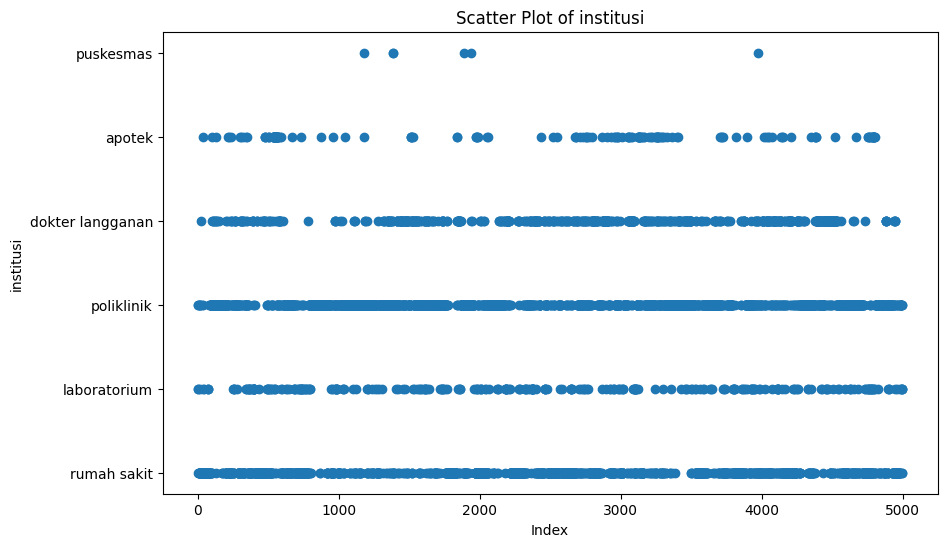

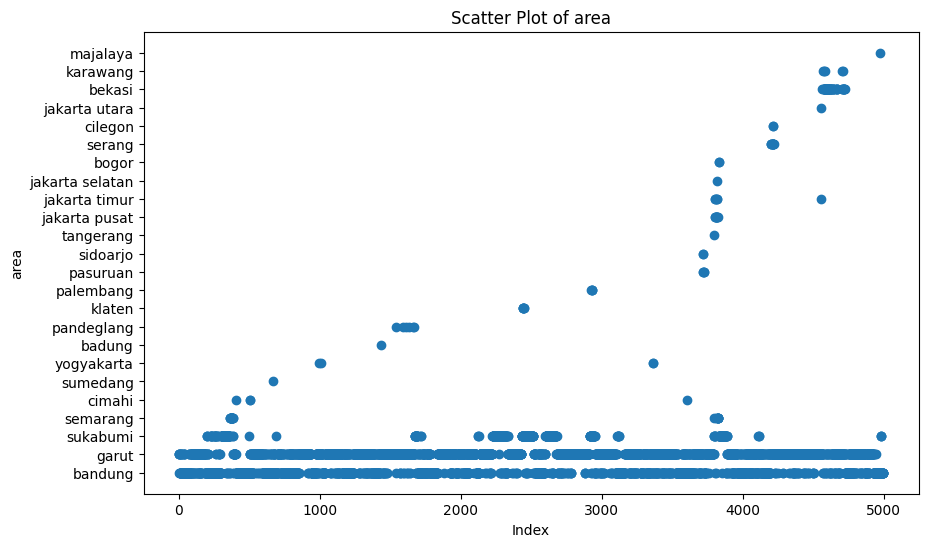

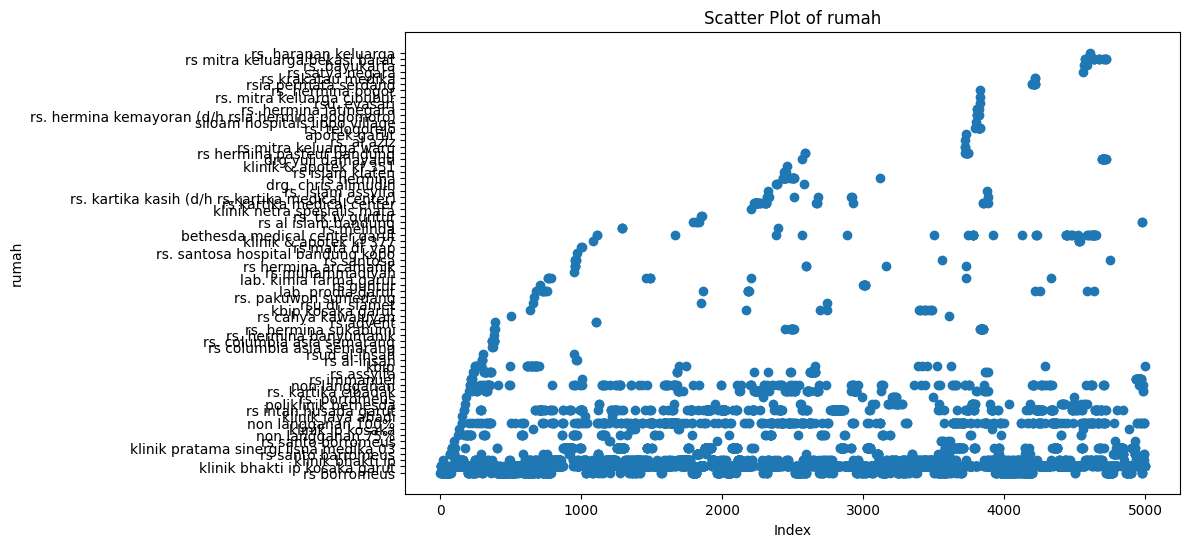

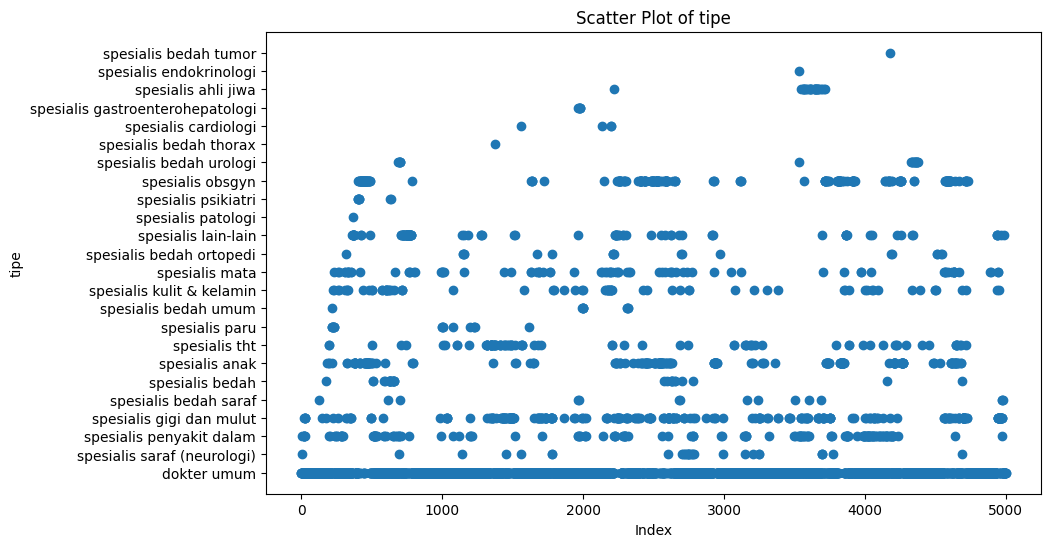

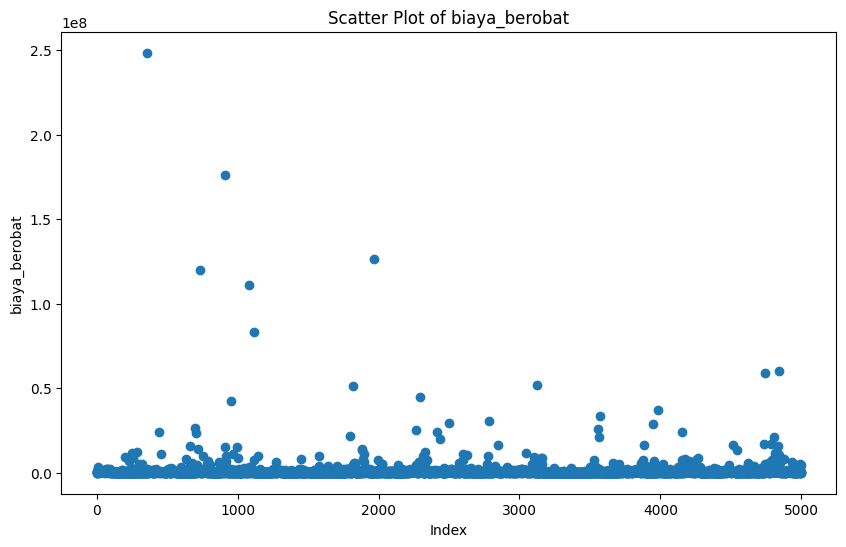

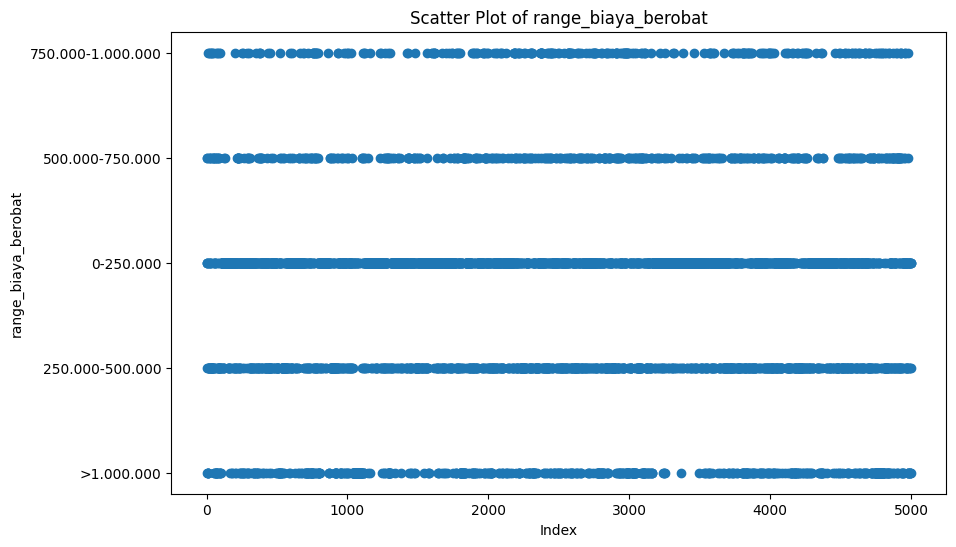

In [9]:
for column in df.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(df.index, df[column])
  plt.title(f"Scatter Plot of {column}")
  plt.xlabel("Index")
  plt.ylabel(column)
  plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat'])

In [11]:

dataolahencoding.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat,range_biaya_berobat,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500.0,>1.000.000,404,5,1,24,0,2724
1,2,hiperlipidemia,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,454000.0,250.000-500.000,409,2,6,9,0,1890
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000.0,0-250.000,409,3,6,9,0,51
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500.0,0-250.000,1270,3,6,9,0,137
4,5,check up,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,586000.0,500.000-750.000,119,2,6,9,0,2181


In [12]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'biaya_berobat'], axis=1)
dataolahencoding.head()


,no,range_biaya_berobat,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,>1.000.000,404,5,1,24,0,2724
1,2,250.000-500.000,409,2,6,9,0,1890
2,3,0-250.000,409,3,6,9,0,51
3,4,0-250.000,1270,3,6,9,0,137
4,5,500.000-750.000,119,2,6,9,0,2181


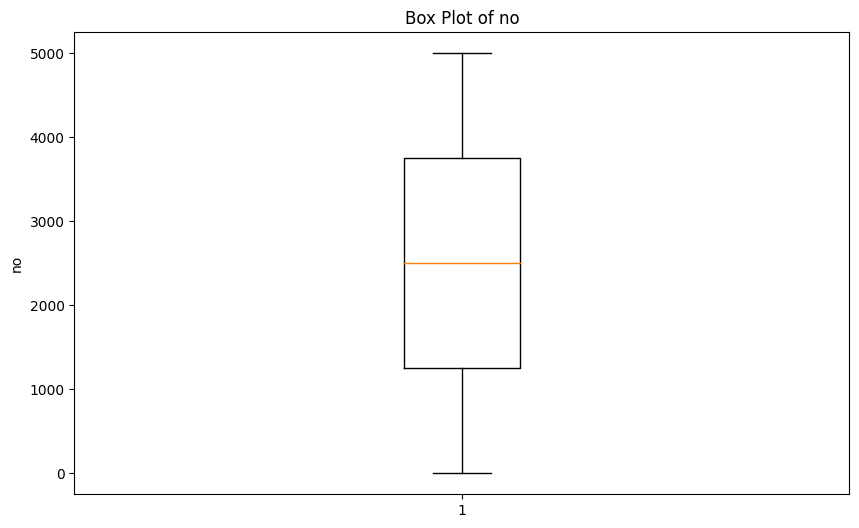

Skipping box plot for non-numeric column: range_biaya_berobat


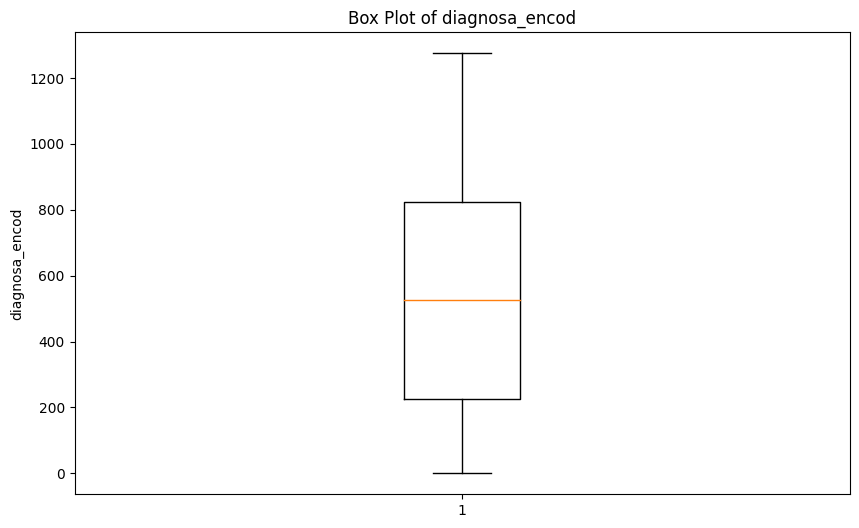

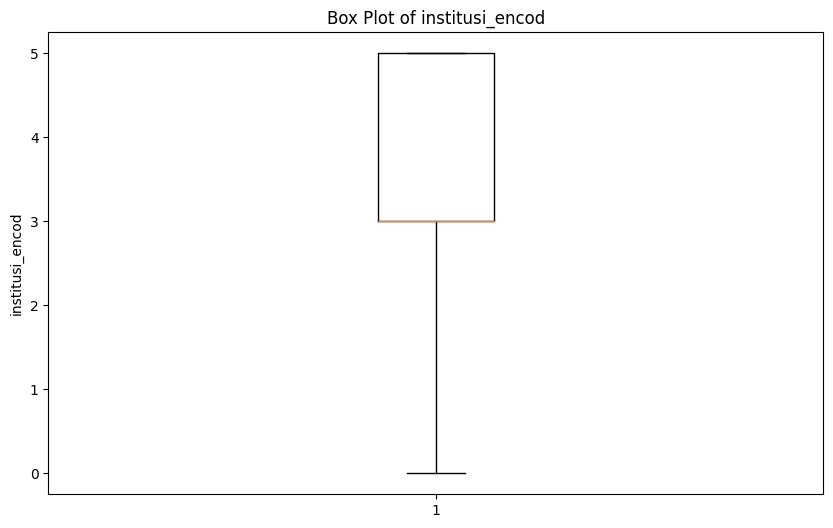

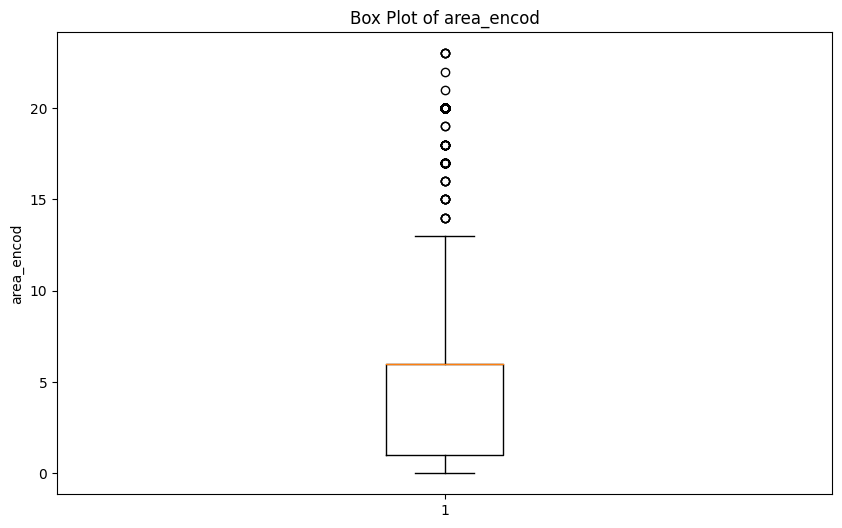

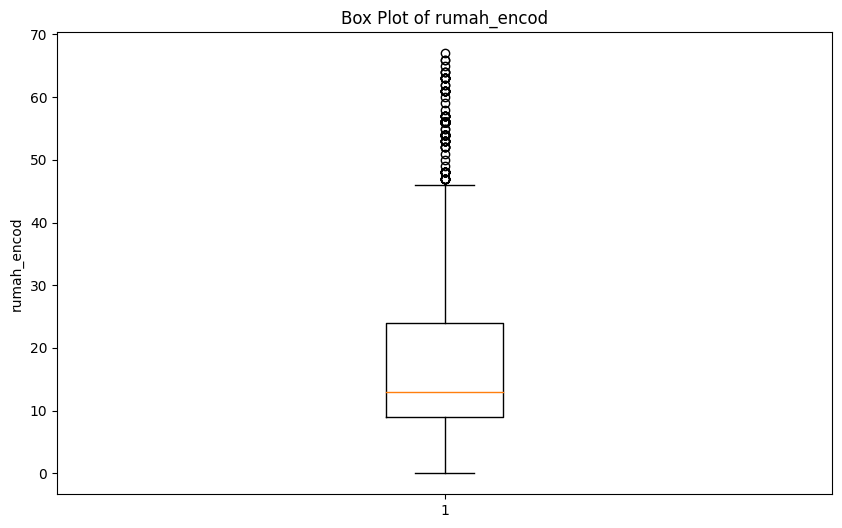

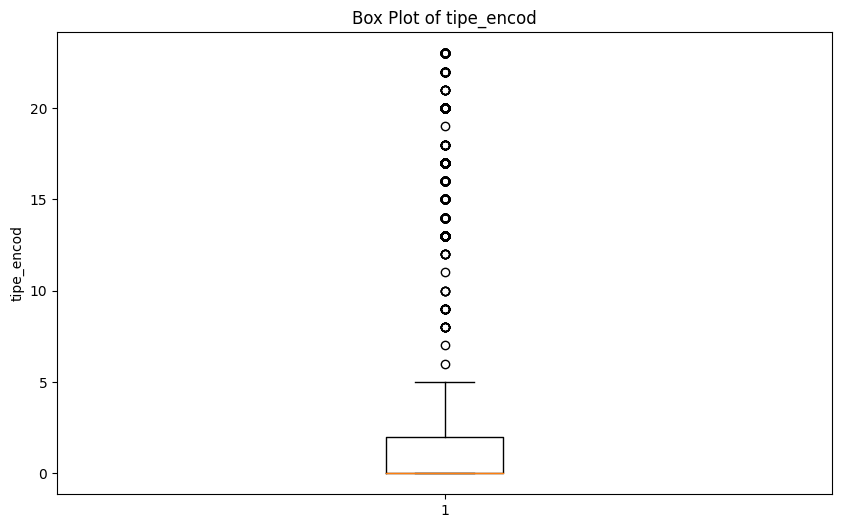

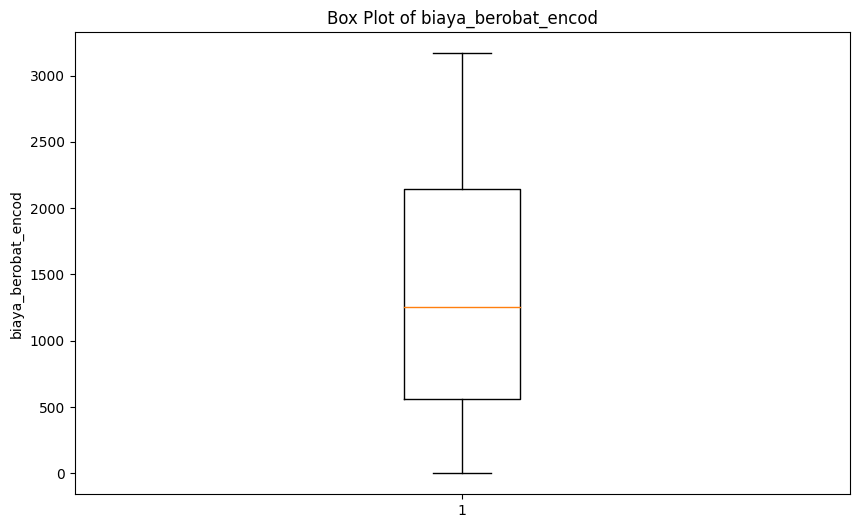

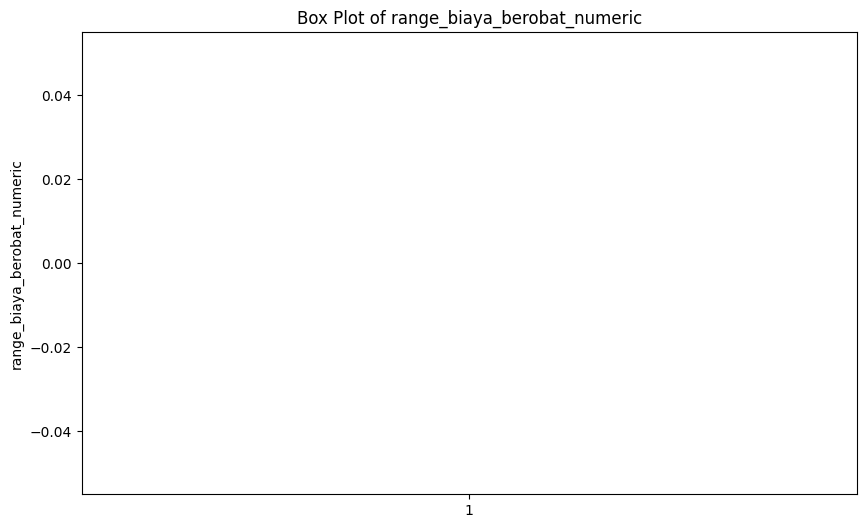

In [15]:
dataolahencoding['range_biaya_berobat_numeric'] = pd.to_numeric(dataolahencoding['range_biaya_berobat'].str.split('-').str[0], errors='coerce')

for column in dataolahencoding.columns:
  if pd.api.types.is_numeric_dtype(dataolahencoding[column]):  # Check if column is numeric
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataolahencoding[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()
  else:
    print(f"Skipping box plot for non-numeric column: {column}")

In [17]:
import numpy as np
import pandas as pd

def find_outliers_iqr(data):
  # Convert data to numeric if it's not already
  if not pd.api.types.is_numeric_dtype(data):
    data = pd.to_numeric(data, errors='coerce')  # Convert to numeric, handle errors

  # Proceed with outlier calculation if data is numeric
  if pd.api.types.is_numeric_dtype(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers
  else:
    print(f"Skipping outlier calculation for non-numeric column")
    return []  # Return empty list for non-numeric columns

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()

Kolom 'area_encod' memiliki outlier:
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 17, 17, 17, 20, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 20, 20, 20, 21, 20, 23, 23, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20

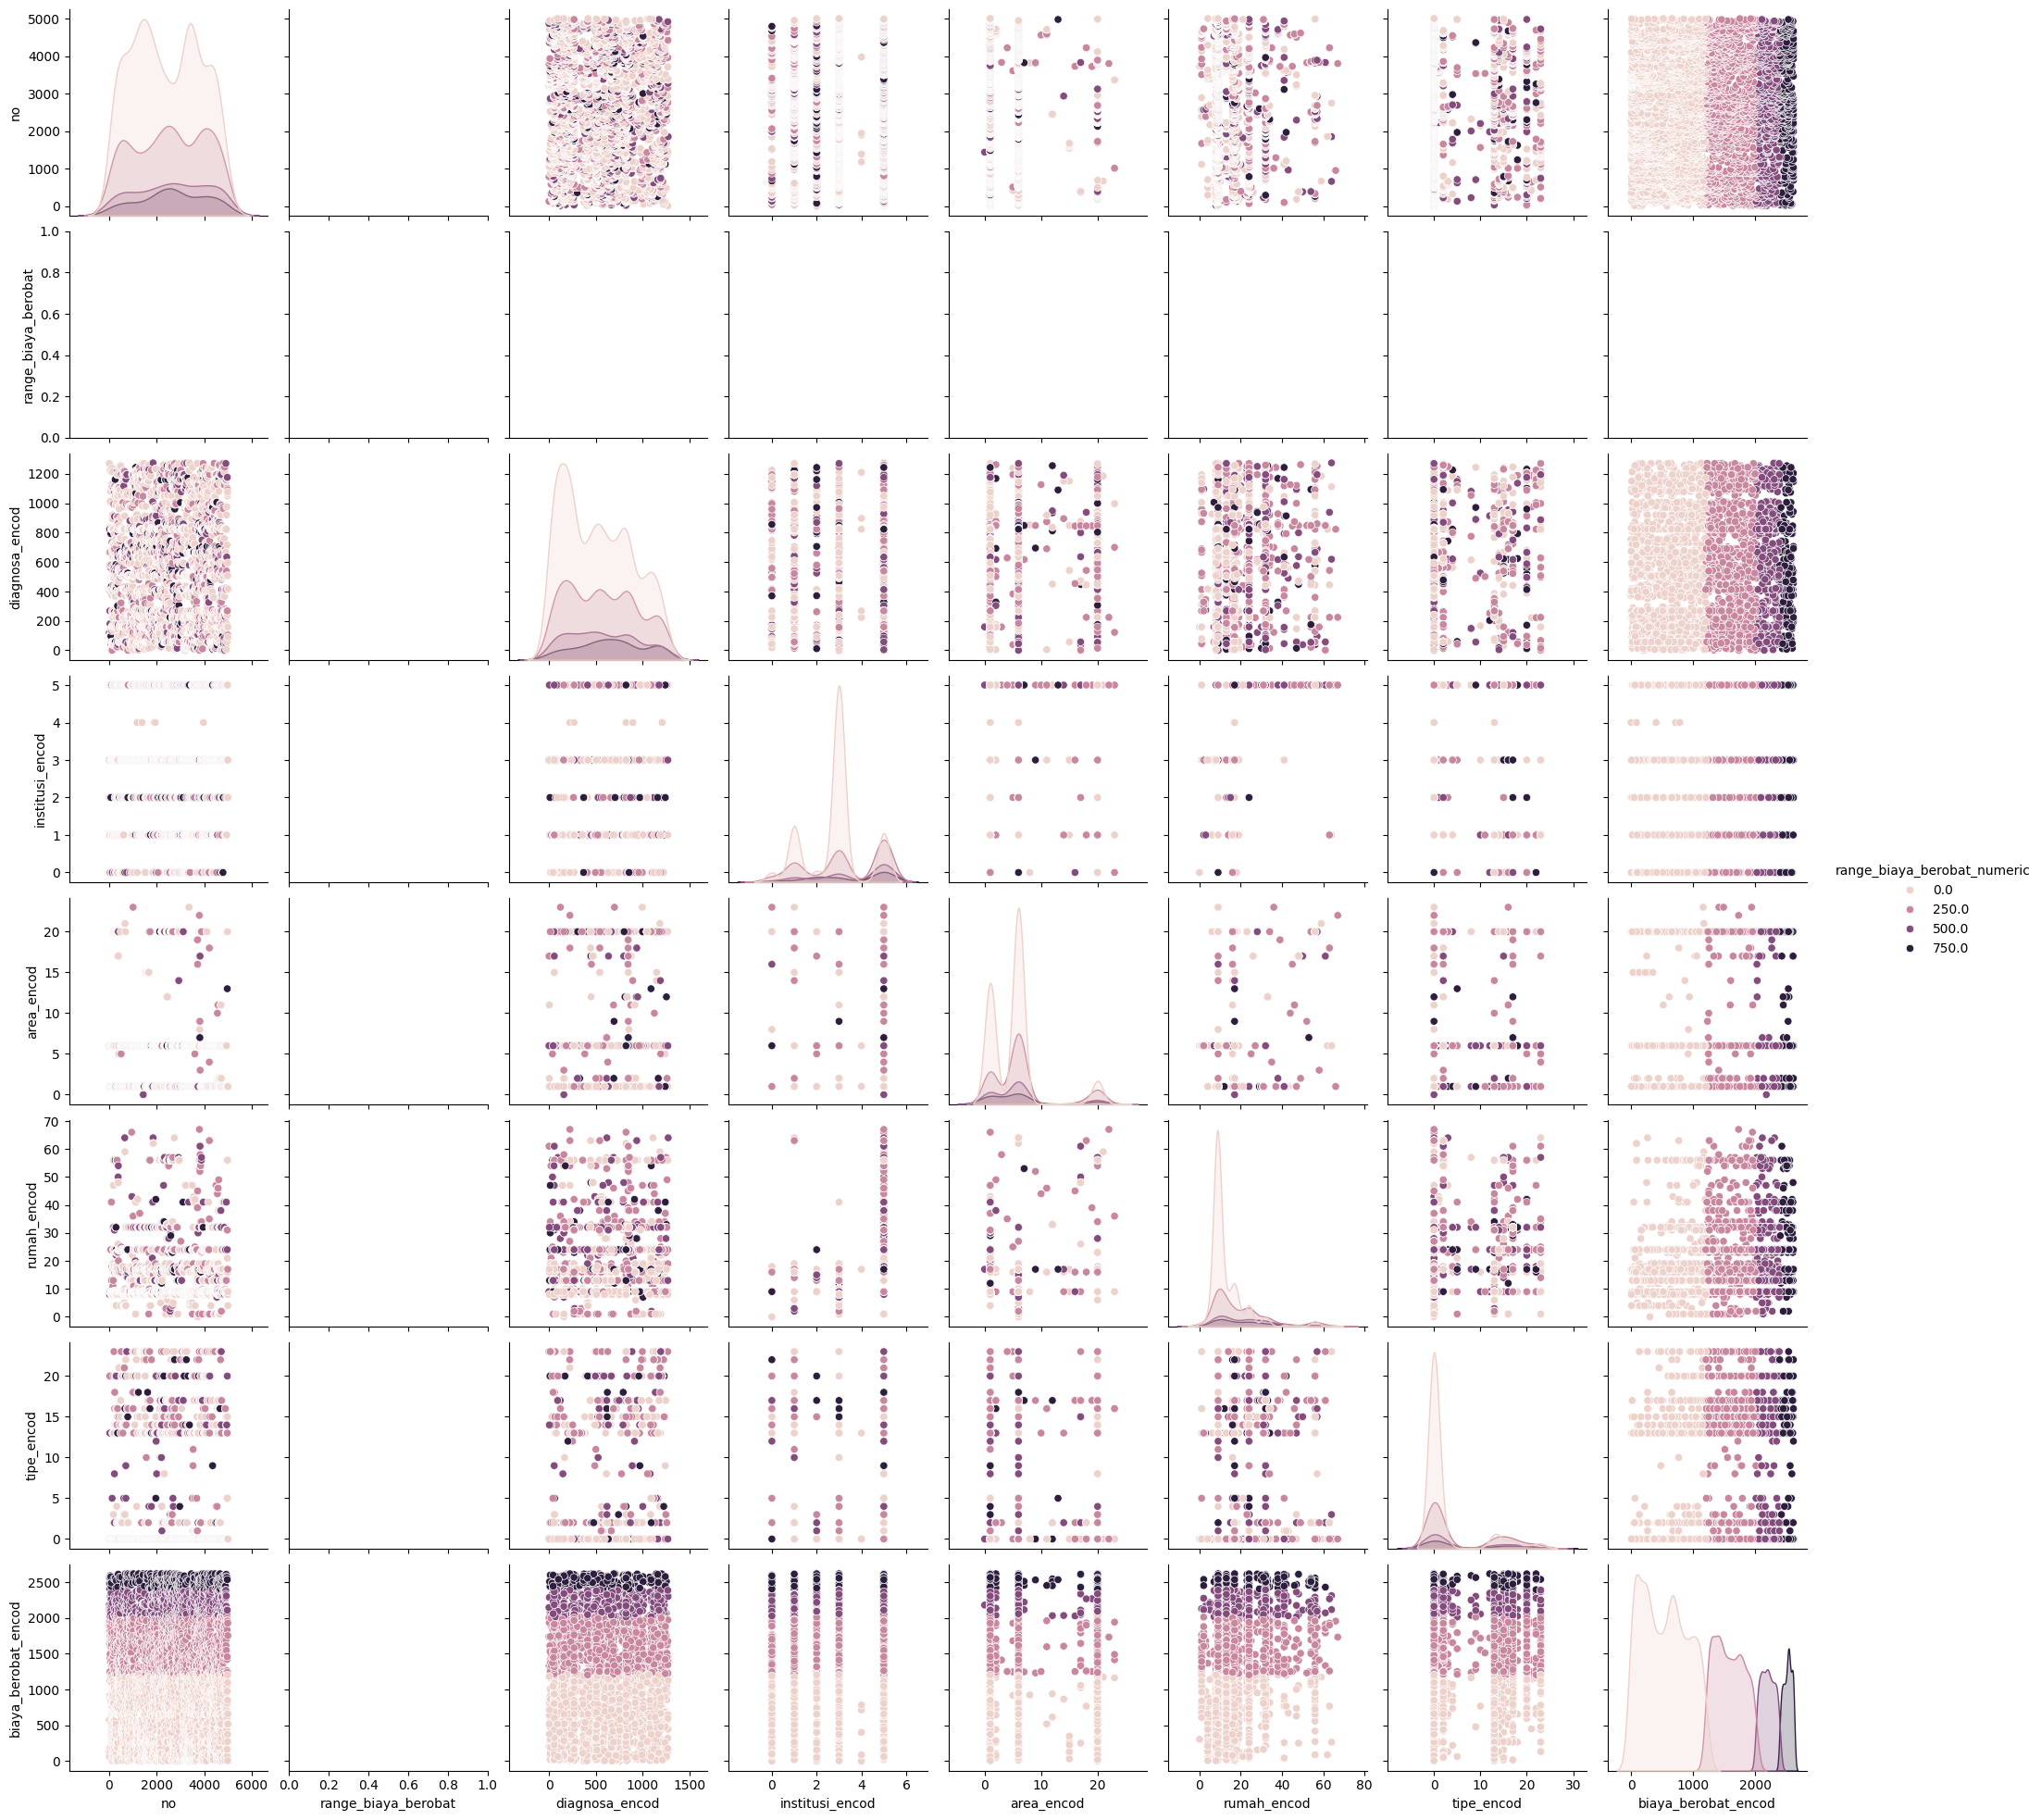

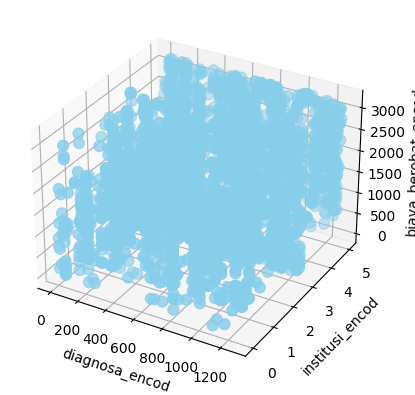

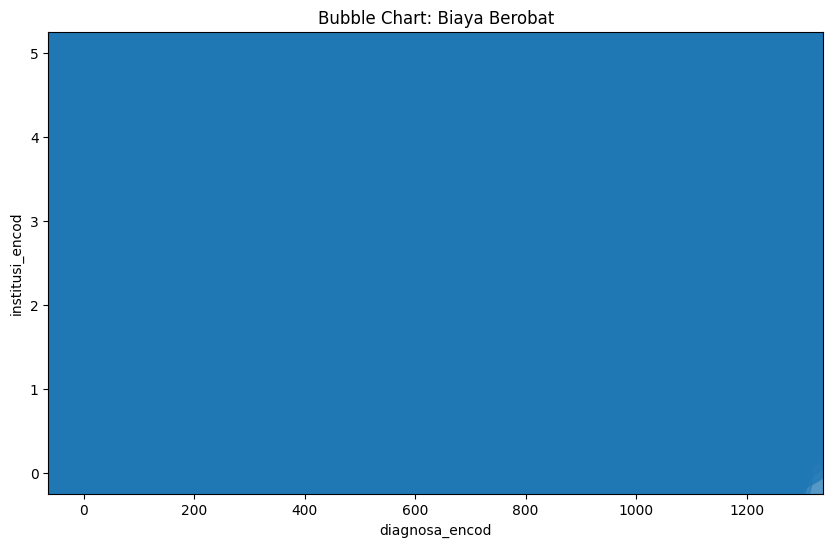

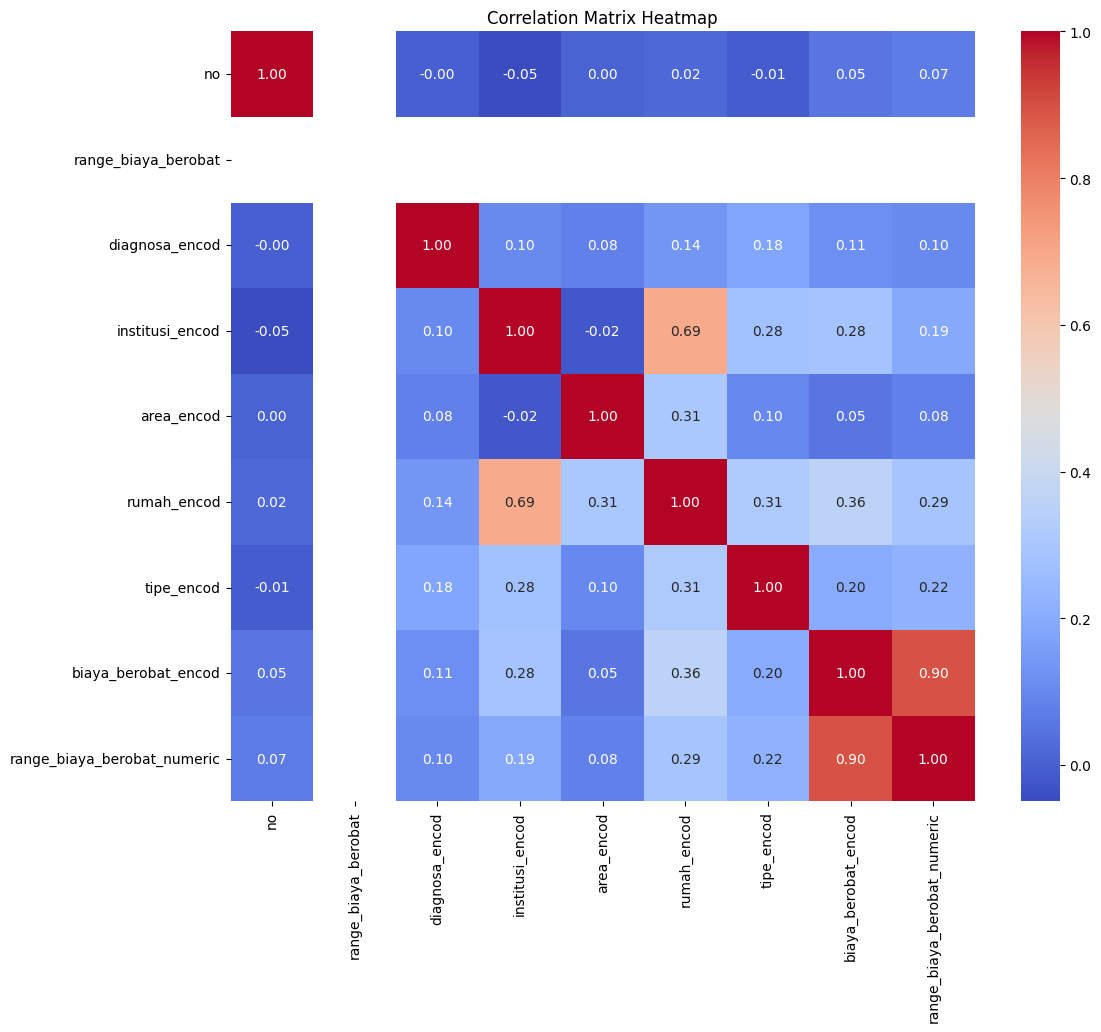

In [24]:
# prompt:  5 diagram Multivariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot Matrix (Pairs Plot)
sns.pairplot(dataolahencoding, hue='range_biaya_berobat_numeric')
plt.show()

# 2. 3D Scatter Plot (if you have 3 relevant numeric variables)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dataolahencoding['diagnosa_encod']
y = dataolahencoding['institusi_encod']
z = dataolahencoding['biaya_berobat_encod']

ax.scatter(x, y, z, c='skyblue', s=60)
ax.set_xlabel('diagnosa_encod')
ax.set_ylabel('institusi_encod')
ax.set_zlabel('biaya_berobat_encod')
plt.show()

# 3. Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(dataolahencoding['diagnosa_encod'], dataolahencoding['institusi_encod'], s=dataolahencoding['biaya_berobat_encod']*10, alpha=0.5)
plt.xlabel('diagnosa_encod')
plt.ylabel('institusi_encod')
plt.title('Bubble Chart: Biaya Berobat')
plt.show()

# 4. Heatmap with Correlation Matrix
correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5. Interactive Plotly 3D Scatter
import plotly.express as px

fig = px.scatter_3d(dataolahencoding, x='diagnosa_encod', y='institusi_encod', z='biaya_berobat_encod',
              color='range_biaya_berobat_numeric',
              title='Interactive 3D Scatter Plot')
fig.show()

